## 1. Thresholding

<br>

### 1.1 Digital Image 유형

(1) `Binary Image`: 
   - 검은색과 흰색만으로 표현한 것을 바이너리(binary, 이진화)이미지
   - 원하는 모양을 좀 더 정확하게 판단 할 수 있다.
   - 0 과 1 or 0 과 255를 사용 
    
    
(2) `Grayscale image`:
   - 0 ~ 255 사이의 픽셀로 표현
   - 연산의 양을 줄일때 사용
    
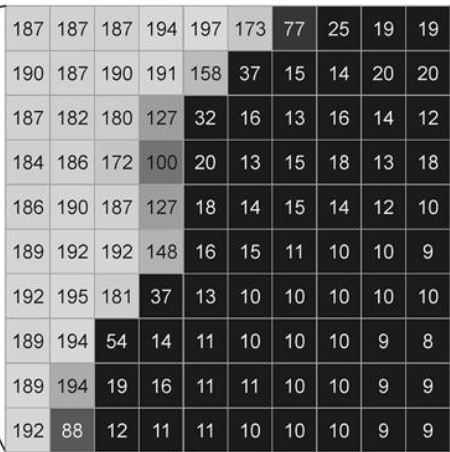
    
                                            값으로 명암을 표현할 수 없고, 점의 밀도로 명암표현

 


### 1.2 Thresholding 종류

#### (1) 기본 Thresholding

`Thresholding`이란 경계점을 기준으로 2 가지 분류로 나누는 것으로 `binary image`를 만드는 가장 대표적인 방법

* ret, out = cv2.threshold(img, threshold, value, type_flag) 
    * Numpy 배열, 변환할 이미지 
    * threshold : 경계 값 
    * value : 경계 값 기준에 만족하는 픽셀에 적용할 값 
    * type_flag : 스레시홀드 적용 방법 지정 
        * - cv2.THRESH_BINARY : 픽셀 값이 경계 값을 넘으면 value 값을 지정하고 넘지 못하면 0 지정 
        * - cv2.THRESH_BINARY_INV : ‘cv2.THRESH_BINARY ’의 반대 
        * - cv2.THRESH_TRUNC : 픽셀 값이 경계 값을 넘으면 value 값을 지정하고 넘지 못하면 유지
        * - cv2.THRESH_TOZERO : 픽셀 값이 경계값을 넘으면 유지, 아니면 0 
        * - cv2.THRESH_TOZERO_INV : ‘cv2.THRESH_TOZERO’의 반대 
    * ret : 스레시홀딩에 사용한 경계값 
    * out : 결과 바이너리 이미지

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

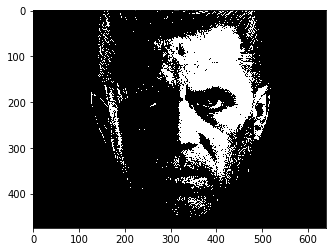

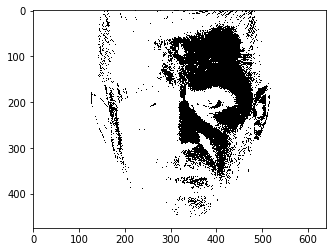

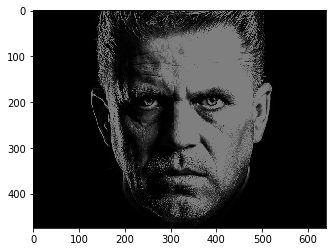

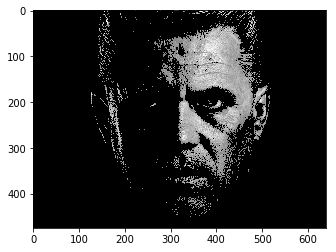

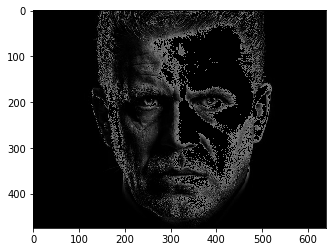

In [15]:
img = cv2.imread('img/man_face.jpg', cv2.IMREAD_GRAYSCALE)

imgs = []

ret, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs.append(t_bin)
imgs.append(t_bininv)
imgs.append(t_truc)
imgs.append(t_2zr)
imgs.append(t_2zrinv)

for i in imgs:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

### (2) 적응형 스레시홀드
#### * cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)  
: method에 따라 임계값을 결정 (전체픽셀이 하나의 기준이 아니라 영역에 따라 다른 임계값 사용) 
   * src : grayscale image
   * maxValue : 임계값 
   * adaptiveMethod : 경계 값 결정 방법 
       * cv2.ADPTIVE_THRESH_MEAN_C : 이웃 픽셀의 평균으로 설정
       * cv2.ADPTIVE_THRESH_CAUSSIAN_C : 가우시안 분포에 따른 가중치의 합으로 결정 
   * thresholdType : 스레시홀드 적용 방법 지정 (cv2.threshold() 함수와 동일) 
   * blockSize : Thresholding을 적용할 영역 사이즈 (nxn), 홀수(3,5,7,…)
   * C : 계산된 경계 값 결과(평균이나 가중평균)에서 차감할 값(음수가능) 

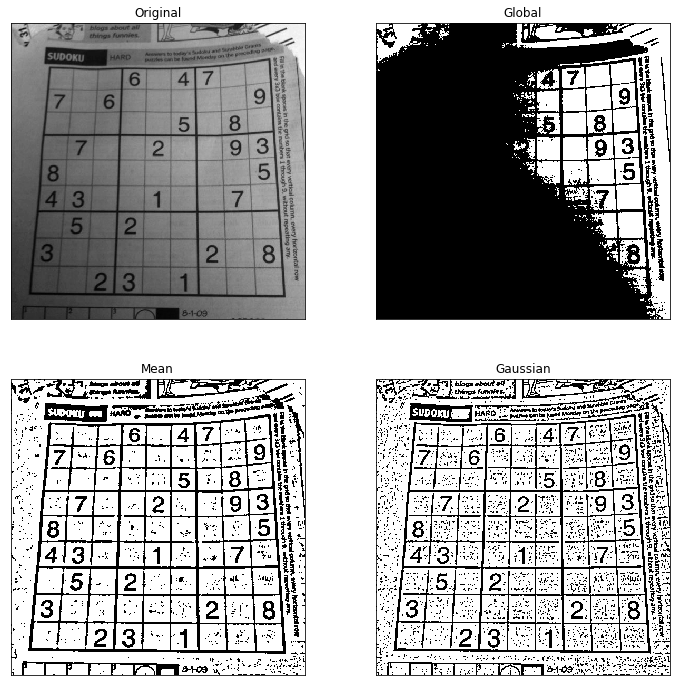

In [7]:
image = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE)


ret, th1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY) 

th2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                            cv2.THRESH_BINARY, 21, 3)

th3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 15, 2)

titles = ["Original", 'Global', "Mean", "Gaussian"]

images = [image, th1, th2, th3]

plt.figure(figsize=(12,12))
for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

<br>

### (3) 오츠(Otsu) 의 이진화
   - `binmodal image` 에서 임계값을 자동으로 계산해주는 것
<br>

   *binmodal image* : 히스토그램으로 분석하면 2개의 peak가 있는 이미지
<br>

   - 활용방법 : ret, t_img = cv2.threshold(img, 0, 255, cv.THRESH_BINARY | **cv2.THRESH_OTSU**) 
   - ret : 실행후 결과값 (경계 반환값)
   - 영상을 구성하는 값들을 0과 255 두 가지 값으로 분리(Segmentaion)
   - 화소값의 분포에 따라 자동적으로 값을 선택하는 이진화 방법
   - 즉, 흰색과 검은색으로 영상이 분리가 된다.
   - 이득 함수 = 클래스1일 확률 * 클래스2일 확률 *(클래스1의 평균 - 클래스 2의 평균)^2
   - 임계값 = 이득함수를 최대로 하는 히스토그램 레벨



출처: https://yongku.tistory.com/entry/영상처리OpenCV-Python-오츠-이진화-구현하기 [츄르 사려고 코딩하는 집사]

<br>

### Otsu의 이진화 예시 01

otsu threshold: 131.0


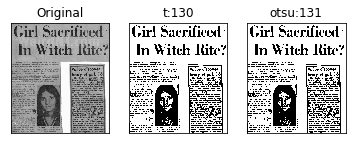

In [74]:
img = cv2.imread('img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) 

# 경계 값을 130으로 지정 
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        

# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값(ret) 출력

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}

#enumerate : 튜플형태로 인덱스번호와 원소를 같이 출력
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([]) 

plt.show()

<br>

### Otsu의 이진화 예시 02

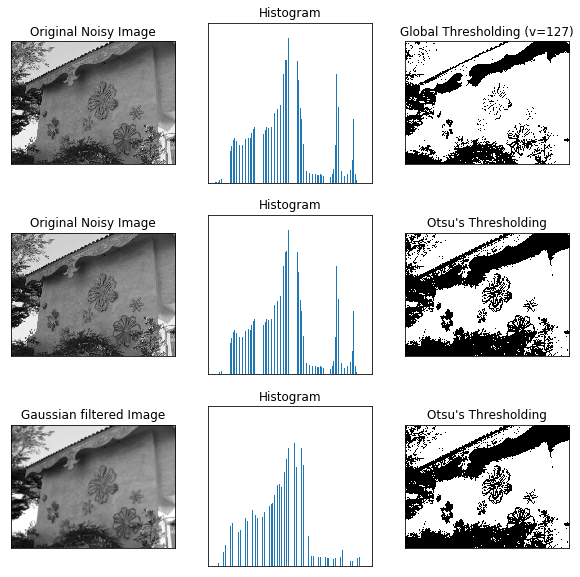

In [5]:
img = cv2.imread('img/abnormal.jpg',0)

# global thresholding 경계값 127
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 오츠 이진화
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) 

# 가우시안 블러 처리
blur = cv2.GaussianBlur(img,(5,5),0)
ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 
          'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image',
          'Histogram',"Otsu's Thresholding"]


plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()